In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

d = pd.read_csv('aggregation/analysis_df_11012024.csv')

In [60]:
d.columns

Index(['BoroName', 'BoroCT2020', 'NTAName', 'CDTANAME', 'PUMA', 'NTA2020',
       'CDTA2020', 'n_total', 'n_classified_positive', 'n_tp', 'n_fp', 'n_tn',
       'n_fn', 'total_not_annotated', 'positives_not_annotated',
       'negatives_not_annotated', 'empirical_estimate_ct', 'p_y',
       'p_y_CI_lower', 'p_y_CI_upper', 'at_least_one_positive_image_by_area',
       'at_least_one_positive_image_by_area_CI_lower',
       'at_least_one_positive_image_by_area_CI_upper', 'total_population',
       'nhl_white_alone', 'nhl_black_alone', 'hispanic_alone',
       'nhl_asian_alone', 'total_households', 'num_households_with_internet',
       'num_households_with_smartphone', 'median_household_income',
       'num_high_school_graduates', 'num_bachelors_degree',
       'num_graduate_degree', 'num_limited_english_speaking_households',
       'ft_elevation_min', 'ft_elevation_max', 'ft_elevation_mean', 'area',
       'n_floodnet_sensors', 'dep_moderate_1_area', 'dep_moderate_2_area',
       'dep_mo

# basic exploratory analysis

In [61]:
pd.set_option('display.max_columns', 500)
d['p_y_percentile'] = d['p_y'].rank(pct=True) * 100
d['confirmed_flooded_image'] = d['at_least_one_positive_image_by_area'] == 1

d['white_frac'] = d['nhl_white_alone'] / d['total_population'] 
d['black_frac'] = d['nhl_black_alone'] / d['total_population']
d['hispanic_frac'] = d['hispanic_alone'] / d['total_population']
d['asian_frac'] = d['nhl_asian_alone'] / d['total_population']

d.head()


,BoroName,BoroCT2020,NTAName,CDTANAME,PUMA,NTA2020,CDTA2020,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated,empirical_estimate_ct,p_y,p_y_CI_lower,p_y_CI_upper,at_least_one_positive_image_by_area,at_least_one_positive_image_by_area_CI_lower,at_least_one_positive_image_by_area_CI_upper,total_population,nhl_white_alone,nhl_black_alone,hispanic_alone,nhl_asian_alone,total_households,num_households_with_internet,num_households_with_smartphone,median_household_income,num_high_school_graduates,num_bachelors_degree,num_graduate_degree,num_limited_english_speaking_households,ft_elevation_min,ft_elevation_max,ft_elevation_mean,area,n_floodnet_sensors,dep_moderate_1_area,dep_moderate_2_area,dep_moderate_1_frac,dep_moderate_2_frac,GEOID,sewer_backup_311c,street_flooding_311c,catch_basin_clogged/flooding_311c,manhole_overflow_311c,highway_flooding_311c,p_y_percentile,confirmed_flooded_image,white_frac,black_frac,hispanic_frac,asian_frac
0,Manhattan,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),4121,MN0191,MN01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.057156,3.386975e-313,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,-666666666,0,0,0,0,0.0,19.0,8.153329,1.842850e+06,0.0,0.000000,0.000000,0.000000,0.000000,36061000100,0,0,0,0,0,98.150538,False,NaN,NaN,NaN,NaN
1,Manhattan,1000201,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,320.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,320.0,0.000000,0.002501,3.394007e-05,0.015286,0.358249,0.010802,0.992768,2666,238,216,1747,400,878,726,740,45582,324,120,130,155,0.0,37.0,10.417681,9.723159e+05,0.0,0.000000,0.000000,0.000000,0.000000,36061000201,0,0,0,0,0,54.193548,False,0.089272,0.081020,0.655289,0.150038
2,Manhattan,1000600,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,845.0,2.0,1.0,0.0,1.0,0.0,843.0,1.0,843.0,0.002367,0.009022,5.469974e-04,0.030567,1.000000,1.000000,1.000000,10751,859,654,3301,5567,5191,3792,3773,25655,2074,1559,268,1777,0.0,41.0,10.160654,2.582715e+06,0.0,22125.725302,6619.532228,0.008567,0.002563,36061000600,0,1,0,0,0,89.677419,True,0.079900,0.060832,0.307041,0.517812
3,Manhattan,1001401,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,182.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,182.0,0.000000,0.001656,3.105866e-05,0.010369,0.190792,0.005637,0.849985,3165,2224,85,314,251,1648,1300,1287,89873,310,867,863,111,24.0,43.0,34.847163,1.006120e+06,0.0,0.000000,0.000000,0.000000,0.000000,36061001401,1,0,0,0,0,32.387097,False,0.702686,0.026856,0.099210,0.079305
4,Manhattan,1001402,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,771.0,0.0,0.0,0.0,1.0,0.0,770.0,0.0,771.0,0.000000,0.000989,3.676340e-06,0.006344,0.328103,0.002830,0.992603,3286,881,250,860,1099,1733,1335,1452,46615,550,896,300,545,13.0,42.0,27.553037,1.226211e+06,0.0,3803.485935,3611.188630,0.003102,0.002945,36061001402,0,0,0,0,0,11.311828,False,0.268107,0.076080,0.261716,0.334449


In [62]:
d[['dep_moderate_1_area', 'dep_moderate_2_area']].describe()

,dep_moderate_1_area,dep_moderate_2_area
count,2325.000000,2325.000000
mean,33568.760303,17255.146006
std,77947.773371,49174.765211
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5218.905103,0.000000
75%,33654.810667,9687.678466
max,886801.431017,660823.683992


In [63]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='spearman')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.000000,0.431617,0.448244
empirical_estimate_ct,0.431617,1.000000,0.576621
at_least_one_positive_image_by_area,0.448244,0.576621,1.000000


In [64]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='pearson')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.000000,0.925180,0.362018
empirical_estimate_ct,0.925180,1.000000,0.385908
at_least_one_positive_image_by_area,0.362018,0.385908,1.000000


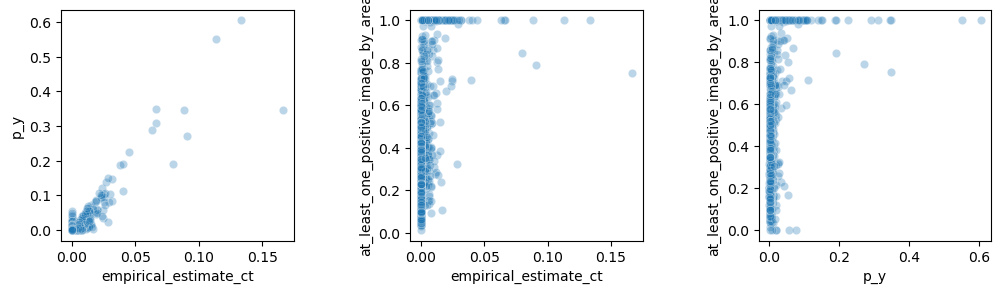

In [65]:
# pairplot of these three using seaborn
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='p_y', alpha=0.3)
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='p_y', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplots_adjust(wspace=0.5)



# 311

### sanity check: all correlations are positive. 

Optimization terminated successfully.
         Current function value: 0.542433
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.539307
         Iterations 5


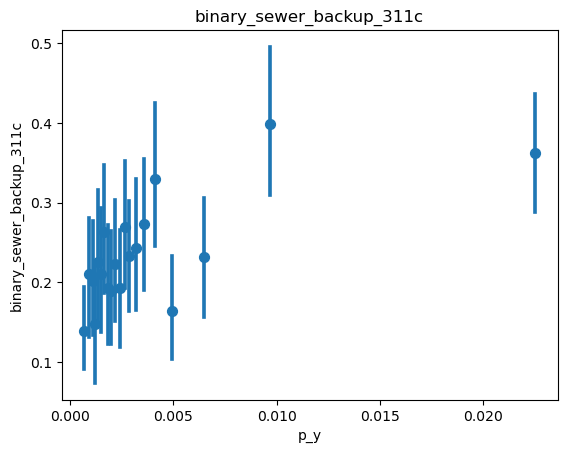

Optimization terminated successfully.
         Current function value: 0.415189
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.411605
         Iterations 6


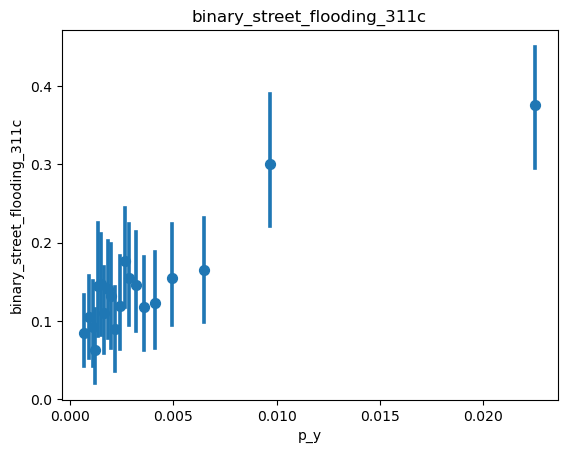

Optimization terminated successfully.
         Current function value: 0.403557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.405767
         Iterations 6


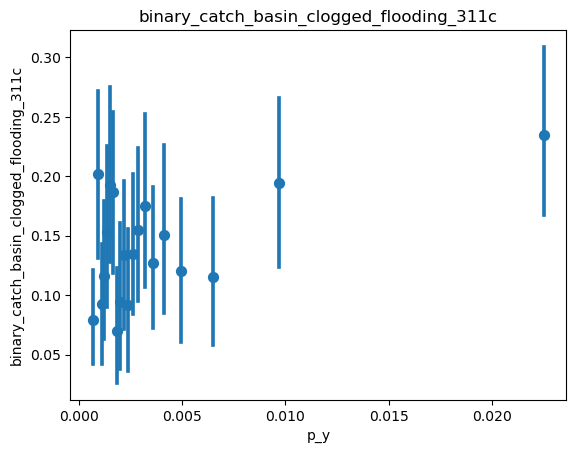

Optimization terminated successfully.
         Current function value: 0.073320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.073150
         Iterations 9


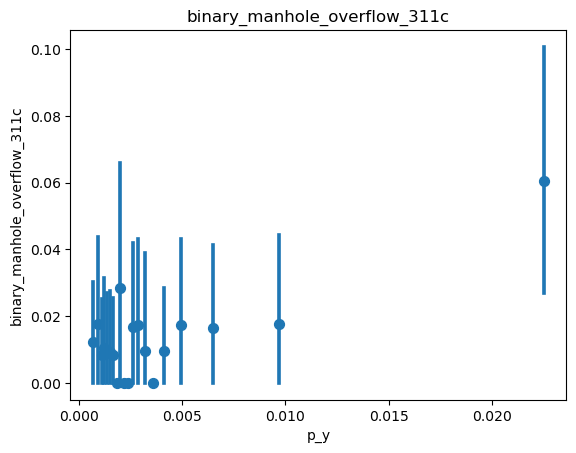

Optimization terminated successfully.
         Current function value: 0.003642
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.002500
         Iterations 18


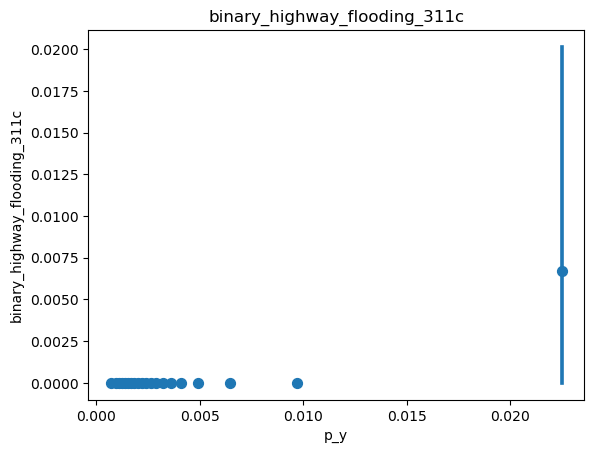

Optimization terminated successfully.
         Current function value: 0.657330
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.656171
         Iterations 5


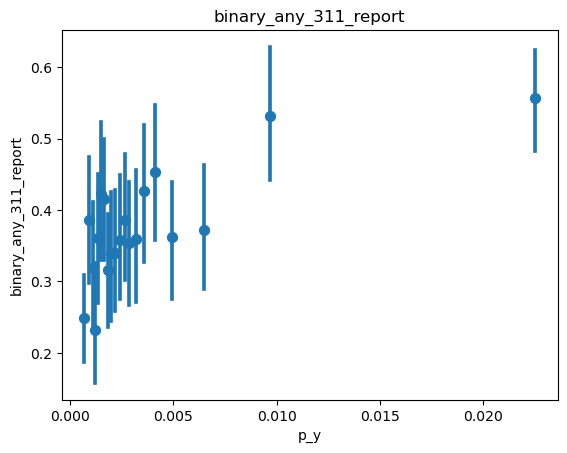

,binary_sewer_backup_311c I,binary_sewer_backup_311c II,binary_street_flooding_311c I,binary_street_flooding_311c II,binary_catch_basin_clogged_flooding_311c I,binary_catch_basin_clogged_flooding_311c II,binary_manhole_overflow_311c I,binary_manhole_overflow_311c II,binary_highway_flooding_311c I,binary_highway_flooding_311c II,binary_any_311_report I,binary_any_311_report II
Intercept,-1.2275***,-1.6584***,-1.8305***,-2.5443***,-1.8634***,-2.0518***,-4.3208***,-5.1163***,-7.9003***,-55.1961,-0.5702***,-0.9239***
,(0.0510),(0.1053),(0.0618),(0.1366),(0.0620),(0.1248),(0.1819),(0.4369),(1.0649),(50.3953),(0.0458),(0.0888)
p_y,6.4381***,,11.6455***,,6.7824***,,6.4946***,,7.8134,,10.7537***,
,(1.8811),,(2.3885),,(1.8261),,(2.1754),,(6.6627),,(2.7193),
p_y_percentile,,0.0092***,,0.0149***,,0.0048**,,0.0156**,,0.5138,,0.0083***
,,(0.0017),,(0.0021),,(0.0021),,(0.0064),,(0.5139),,(0.0015)


In [66]:
all_311_models = []
d['any_311_report'] = False
for k in d.columns:
    if '311' in k:
        d['any_311_report'] = d['any_311_report'] | (d[k] > 0) 

for k in d.columns:
    if ('311' in k):
        col_name = ('binary_%s' % k).replace('/', '_')
        d[col_name] = (d[k] > 0) * 1.
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y' % col_name, data = d).fit())
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y_percentile' % col_name, data = d).fit())
        # plot probability of 311 report as function of p_y
        plt.figure()
        sns.regplot(data=d, x='p_y', y=col_name,  x_bins=20, fit_reg=False)
        plt.title(col_name)
        plt.show()
        del d[col_name]
    

summary_col(all_311_models, stars=True)

### still, our model identifies lots of high-risk areas with no 311 reports!

In [67]:
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no 311 report: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_311_report'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no 311 report: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no 311 report: 0.526
Population in these locations: 747091.000
Fraction of locations at percentile 90 or higher of p_y with no 311 report: 0.455
Population in these locations: 287527.000
Fraction of locations at percentile 95 or higher of p_y with no 311 report: 0.419
Population in these locations: 126818.000
fraction of locations with confirmed positive image with no 311 report: 0.464
Population in these locations: 211409.000


### preliminary estimate of bias (todo: redo this with better measures of race and demographics). 

In [68]:
d['any_311_report'] = d['any_311_report'] * 1.


race_models = []
for col in ['white_frac', 'black_frac', 'hispanic_frac', 'asian_frac']:
    race_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ at_least_one_positive_image_by_area + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())
summary_col(race_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.656680
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.650706
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659193
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.650910
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.661047
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.649078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643146
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.651439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657710
  

,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII,any_311_report IIIIIII,any_311_report IIIIIIII,any_311_report IIIIIIIII,any_311_report IIIIIIIIII,any_311_report IIIIIIIIIII,any_311_report IIIIIIIIIIII
Intercept,-0.7051***,-1.0431***,-0.6688***,-0.5830***,-1.0372***,-0.5529***,-0.2063***,-0.6063***,-0.1676**,-0.6401***,-1.0218***,-0.5930***
,(0.0682),(0.0865),(0.0669),(0.0600),(0.0878),(0.0581),(0.0716),(0.0944),(0.0699),(0.0612),(0.0840),(0.0589)
p_y,16.5431***,,,17.0957***,,,16.5758***,,,17.2040***,,
,(3.7921),,,(3.8600),,,(3.8391),,,(3.8577),,
white_frac,0.4663***,0.3094*,0.4651***,,,,,,,,,
,(0.1551),(0.1580),(0.1550),,,,,,,,,
at_least_one_positive_image_by_area,,1.3991***,,,1.4842***,,,1.3815***,,,1.4390***,
,,(0.1779),,,(0.1780),,,(0.1776),,,(0.1764),
confirmed_flooded_image[T.True],,,0.8708***,,,0.8855***,,,0.8654***,,,0.8800***
,,,(0.1745),,,(0.1742),,,(0.1755),,,(0.1743)


In [69]:
# internet access models 
# num_households_with_internet, num_households_with_smartphone 

d['frac_internet'] = d['num_households_with_internet'] / d['total_households']
d['frac_smartphone'] = d['num_households_with_smartphone'] / d['total_households']

internet_models = []
for col in ['frac_internet', 'frac_smartphone']:
    internet_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    internet_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(internet_models, stars=True)


Optimization terminated successfully.
         Current function value: 0.658461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660964
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658556
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660607
         Iterations 4


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII
Intercept,-1.0832**,-0.8697**,-0.0942,0.1492
,(0.4344),(0.4300),(0.4510),(0.4455)
p_y,18.0030***,,17.5483***,
,(3.9938),,(3.9452),
frac_internet,0.5973,0.3990,,
,(0.4917),(0.4882),,
confirmed_flooded_image[T.True],,0.9371***,,0.9382***
,,(0.1780),,(0.1780)
frac_smartphone,,,-0.5276,-0.7624
,,,(0.5092),(0.5049)


In [70]:
# num limited english speaking households 
d['frac_limited_english'] = d['num_limited_english_speaking_households'] / d['total_households']

limited_english_models = []
for col in ['frac_limited_english']:
    limited_english_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    limited_english_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(limited_english_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.658527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660883
         Iterations 4


,any_311_report I,any_311_report II
Intercept,-0.5091***,-0.4736***
,(0.0661),(0.0645)
p_y,18.0490***,
,(3.9991),
frac_limited_english,-0.3611,-0.3349
,(0.3309),(0.3297)
confirmed_flooded_image[T.True],,0.9476***
,,(0.1783)


In [71]:
# elevation models 
elevation_models = []

for col in ['ft_elevation_min','ft_elevation_mean','ft_elevation_max']:
    elevation_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    elevation_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(elevation_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.649624
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.651137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.651442
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650168
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.651028
         Iterations 5


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII
Intercept,-0.3030***,-0.2844***,-0.2255***,-0.2026***,-0.1780**,-0.1478*
,(0.0637),(0.0630),(0.0756),(0.0746),(0.0826),(0.0812)
p_y,8.5530***,,8.6533***,,9.3000***,
,(2.5486),,(2.5808),,(2.6555),
ft_elevation_min,-0.0089***,-0.0090***,,,,
,(0.0015),(0.0016),,,,
confirmed_flooded_image[T.True],,0.5306***,,0.5627***,,0.6384***
,,(0.1639),,(0.1634),,(0.1627)
ft_elevation_mean,,,-0.0067***,-0.0068***,,
,,,(0.0012),(0.0012),,


In [72]:
# educational attainment 
d['frac_hs'] = d['num_high_school_graduates'] / d['total_population']
d['frac_bachelors'] = d['num_bachelors_degree'] / d['total_population']
d['frac_grad'] = d['num_graduate_degree'] / d['total_population']

education_models = []
for col in ['frac_hs', 'frac_bachelors', 'frac_grad']:
    education_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    education_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(education_models, stars=True)


Optimization terminated successfully.
         Current function value: 0.658133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.661065
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.661041
         Iterations 4


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII
Intercept,-0.7201***,-0.7035***,-0.6449***,-0.5836***,-0.5292***,-0.4803***
,(0.1120),(0.1109),(0.0925),(0.0903),(0.0700),(0.0679)
p_y,17.2033***,,17.2037***,,17.0454***,
,(3.8698),,(3.8637),,(3.8498),
frac_hs,0.9267,1.0457*,,,,
,(0.5855),(0.5844),,,,
confirmed_flooded_image[T.True],,0.8955***,,0.8833***,,0.8865***
,,(0.1745),,(0.1742),,(0.1743)
frac_bachelors,,,0.5114,0.3702,,
,,,(0.4779),(0.4774),,


# flood risk areas

## TODO: currently I just implemented a pretty sketchy version of flood risk by setting dep_light_3_area > 0.

fraction of areas with light flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690050
         Iterations 5
                                             Logit Regression Results                                             
Dep. Variable:     preliminary_measure_of_city_predicted_light_flood_risk   No. Observations:                 2325
Model:                                                              Logit   Df Residuals:                     2323
Method:                                                               MLE   Df Model:                            1
Date:                                                    Fri, 01 Nov 2024   Pseudo R-squ.:                0.002251
Time:                                                            17:31:08   Log-Likelihood:                -1604.4
converged:                                                           True   LL-Null:                       -1608.0
Covariance Type:           

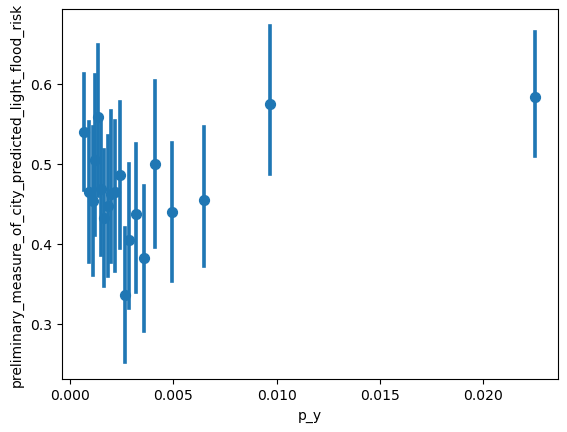

In [73]:
d['preliminary_measure_of_city_predicted_light_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
d['frac_flooded_above_thres'] = d['dep_moderate_2_frac'] > 0.005
print("fraction of areas with light flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_light_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_light_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_light_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



fraction of areas with moderate flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690050
         Iterations 5
                                               Logit Regression Results                                              
Dep. Variable:     preliminary_measure_of_city_predicted_moderate_flood_risk   No. Observations:                 2325
Model:                                                                 Logit   Df Residuals:                     2323
Method:                                                                  MLE   Df Model:                            1
Date:                                                       Fri, 01 Nov 2024   Pseudo R-squ.:                0.002251
Time:                                                               17:31:08   Log-Likelihood:                -1604.4
converged:                                                              True   LL-Null:                       -1608.0
Cov

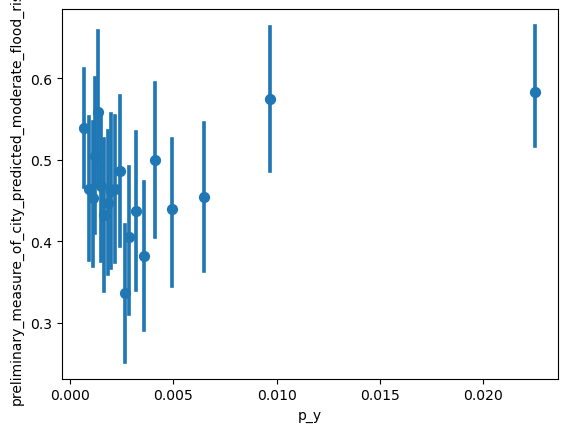

In [74]:
d['preliminary_measure_of_city_predicted_moderate_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
print("fraction of areas with moderate flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_moderate_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_moderate_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_moderate_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



# flood sensors

In [75]:
d['any_sensors'] = d['n_floodnet_sensors'] > 0
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no sensors: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_sensors'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no sensors: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_sensors'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no sensors: 0.946
Population in these locations: 1469346.000
Fraction of locations at percentile 90 or higher of p_y with no sensors: 0.936
Population in these locations: 702558.000
Fraction of locations at percentile 95 or higher of p_y with no sensors: 0.915
Population in these locations: 356846.000
fraction of locations with confirmed positive image with no sensors: 0.917
Population in these locations: 505984.000
